<h2>FIN5615 Project #4
    <p class="text-primary">Black Scholes Options Pricing (Part I)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    The goal of this project is to build an options pricing calculator using the Black-Scholes pricing model. Our calculator will be able to price both put and call options as well as the following set of Greeks: delta, gamma, theta, vega, and rho. 
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a call option is: 
    <br><br>
    $$Call = S_0N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <br>Write an expression that can calculate the price of a call option using the Black-Scholes formula, given the follwowing variables:
    <ul>
        <li><code>stock_price</code> = price of underlying stock at time t</li>
        <li><code>strike</code> = strike price of the options contract</li>
        <li><code>term</code> = remaining time in years left on the option contract</li>
        <li><code>rf</code> = annual risk-free rate</li>
        <li><code>volatility</code> = annualized volatility of the underlying stock</li>
    </ul>
    To check your code, a 6-month call option for a stock priced at \$30, with a strike price of \$35 and volatility of 0.2 and risk-free rate of 1%, should return approximately \$0.3423. 
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
</div>

In [2]:
###Use code below
stock_price = 30
strike = 35     
term = 0.5
rf = .01
volatility = .2

d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + .5 * volatility**2) * term)
d2 = d1 - volatility * np.sqrt(term)

call = stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)
call

0.3422775499415973

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    Write a function called <code>black_sholes_formula</code> that takes in <code>stock_price</code>, <code>strike</code>, <code>term</code>, <code>rf</code>, and <code>volatility</code> as input parameters, and outputs the price of a call option according to the Black-Scholes pricing model.
    <br><br>Double check that the function outputs the same price as the previous task under the following values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [3]:

stock_price = 30
strike = 35
term = 0.5
rf = 0.01
volatility = 0.2
###
N = norm.cdf


def black_sholes_formula(stock_price, strike, term, rf, volatility):
    d1 = (np.log(stock_price/strike) + (rf + volatility**2/2)*term) / (volatility*np.sqrt(term))
    d2 = d1 - volatility * np.sqrt(term)
    call = stock_price * N(d1) - strike * np.exp(-rf*term)* N(d2)


###Use code below
    return call


In [4]:
black_sholes_formula(stock_price = 30, strike = 35, term = 0.5, rf = .01, volatility = .2)

0.3422775499415973

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body">
    Recall that the Black-Scholes formula for the price of a put option is:
    <br><br>
    $$Put = Ke^{-rT}N(-d_2) - S_0N(-d_1)$$
    <br>Modify the function <code>black_sholes_formula</code> by adding an extra input parameter <code>option</code> that can take on either the value <code>'call'</code> or <code>'put'</code>. Depending on the value assigned to the parameter <code>option</code>, <code>black_sholes_formula</code> will output either the price of a call or a put option.
    <br><br>Use the updated <code>black_sholes_formula</code> function to calculate the price of both a <b>call</b> and <b>put</b> option using the following input values:
    <ul>
        <li><code>stock_price</code> = \$30</li>
        <li><code>strike</code> = \$35</li>
        <li><code>term</code> = 6 months</li>
        <li><code>rf</code> = 1%</li>
        <li><code>volatility</code> = 0.2</li>
    </ul>
    The value of the call option should be approximately \$0.3423 and the value of the put option should be approximately $5.1677. Briefly explain why the put option is valued much higher than the call option under the above input values.    
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [5]:
###Use code below


stock_price = 30
strike = 35
term = 0.5
rf = 0.01
volatility = 0.2

N = norm.cdf


def black_scholes_formula(stock_price, strike, term, rf, volatility, option):
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + .5 * volatility**2) * term)
    d2 = d1 - volatility * np.sqrt(term)
    if option == 'call':
        value = stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        value = strike * np.exp(-rf * term) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)
        
    return value
        







In [6]:
black_scholes_formula(stock_price = 30, strike = 35, term = .5, rf = .01, volatility = .2, option = 'call')

0.3422775499415973

In [7]:
black_scholes_formula(stock_price = 30, strike = 35, term = .5, rf = .01, volatility = .2, option = 'put')

5.167714321685477

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Recall that the payoff of a call option is $\max(S_T - K, 0)$.
    <ul>
        <li>Price the value of the call option with \$35 strike, 6 months to termination, at 0.2 volatility and 1% risk-free rate, when stock price ranges from \$10 to \$60 (use \$0.50 increments).</li>
        <li>Also calculate the option's payoff assuming the same range of stock price at termination.</li>
        <li>Plot the ranges of call option prices and payoffs in a single line plot. Provide a legend, x-axis label, and title for the plot.</li>
    </ul>
    Your final plot should look like this:
        
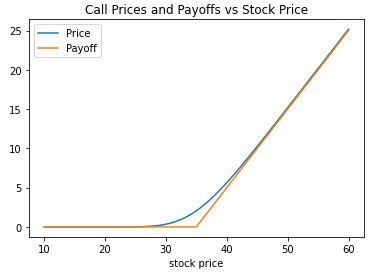
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [8]:
def black_scholes_formula(strike, term, rf, volatility, stock_price):
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf + .5 * volatility**2) * term)
    d2 = d1 - volatility * np.sqrt(term)

    call = stock_price * norm.cdf(d1) - strike * np.exp(-rf * term) * norm.cdf(d2)

    return call

In [9]:
stock_prices = np.arange(10., 60.5, .5)
price = [black_scholes_formula(strike = 35., term = .5, rf = .01, volatility = .2, stock_price = price) for price in stock_prices]

In [10]:
def call_payoff(strike, stock_price):
    payoff = max(stock_price - strike, 0)
    
    return payoff

In [11]:
stock_prices = np.arange(10, 60.5, 0.5)
payoff = [call_payoff(strike = 35., stock_price = price) for price in stock_prices]

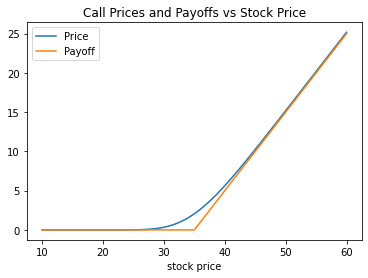

In [12]:
plt.plot(stock_prices, price, label = "price")
plt.plot(stock_prices, payoff, label = "payoff")


plt.xlabel('stock price')

plt.title('Call Prices and Payoffs vs Stock Price')

plt.legend(['Price', 'Payoff'])

plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Recall that given a continuous annual dividend rate $q$:
    <br><br>
    $$Call = S_0e^{-qT}N(d_1) - Ke^{-rT}N(d_2)$$
    <br>$$Put = Ke^{-rT}N(-d_2) - S_0e^{-qT}N(-d_1)$$
    <br>$$d_1 = \frac{1}{\sigma\sqrt{T}}\left[\ln\left(\frac{S_0}{K}\right) + \left(r - q + \frac{1}{2}\sigma^2\right)T\right]$$
    <br>$$d_2 = d_1 - \sigma\sqrt{T}$$
    <ul>
        <li>Add an additional input parameter <code>dividend</code>, to the function <code>black_sholes_formula</code>, representing the continuous rate of dividend paid to shareholders by the stock, with a default value to equal to 0. Modify the Black-Scholes pricing formula to account for the dividend rate.</li>
        <li>Calculate the price of a call option where the stock price is \$30, strike is \$35, term is 6 months, volatility is 20%, that also pays a 2.5% annual dividend, using a risk-free rate of 1%. Your answer should be approximately \$0.2856.</li>
        <li>How does adding a dividend rate influence the price of a call option and why?</li>
    </ul>
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [13]:
def black_scholes_formula(stock_price, strike, term, rf, volatility, option, dividend):
    d1 = (1 / (volatility * np.sqrt(term))) * (np.log(stock_price / strike) + (rf - dividend + .5 * volatility**2) * term)
    d2 = d1 - volatility * np.sqrt(term)
    if option == 'call':
        value = stock_price * norm.cdf(d1) * np.exp(-dividend * term) - strike * np.exp(-rf * term) * norm.cdf(d2)
    elif option == 'put':
        value = strike * np.exp(-rf * term) * norm.cdf(-d2) - stock_price * np.exp(-dividend * term)* norm.cdf(-d1)
        
    return value
        

In [14]:
black_scholes_formula(stock_price = 30, strike = 35, term = .5, rf = .01, volatility = .2, option = 'call', dividend = .025)

0.2856163755278227

So, when we added divident rate to the function it means there would be an unexpected cash dividend. This cash dividend would reduce the stock price on the ex-dividend date. This stock price reduction would not be anticipated by option holders prior to the dividend announcement. As a result, there would be a reduction in the value of a call option and an increase the value of a put option.

